# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Bella Melati Wiranur Dwifani
- **Email:** bellamelati21@if.unjani.ac.id
- **ID Dicoding:** JLX12JYJ6Z72

## Menentukan Pertanyaan Bisnis

- Bagaimana pola dari penggunaan bike-sharing bisa dipengaruhi oleh kondisi cuaca? Akankah ada perbedaan secara signifikan antara pengguna terdaftar dan pengguna yang belum terdaftar dalam pola penggunaan pada hari kerja dan diluar hari kerja?
- Bagaimana korelasi antara suhu dan jumlah perjalanan pada hari kerja dan diluar hari kerja? Apakah nantinya akan terdapat sebuah gaya/mode tertentu yang dapat diidentifikasi berdasarkan variabel cuaca dan hari kerja?

## Import Semua Packages/Library yang Digunakan

In [ ]:
#pip install streamlit

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import streamlit as st

## Data Wrangling

### Gathering Data

Membaca dan menampilkan day_csv

In [6]:
day_df=pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Membaca dan Menampilkan hour_csv


In [7]:
hour_df=pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menampilkan lima baris pertama, informasi dan data statistik dari day_csv

In [8]:
st.subheader('Day Dataset')
st.write(day_df.head())
st.write(day_df.info())
st.write(day_df.describe())


2024-03-08 14:50:33.282 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Menampilkan lima baris pertama, informasi dan data statistik dari hour_csv

In [9]:
st.subheader('Hour Dataset')
st.write(hour_df.head())
st.write(hour_df.info())
st.write(hour_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Cleaning Data

Mengecek apakah ada duplikasi dalam data

In [11]:
st.header('Cleaning Data')
day_df.drop_duplicates(inplace=True) #Duplikat data
st.write("Jumlah duplikasi hari : ", day_df.duplicated().sum())

Mengecek apakah ada data yang hilang pada day_df dan hour_df

In [12]:
st.write("Missing values in day_df:") #missing value
st.write(day_df.isna().sum())
st.write("Missing values in hour_df:")
st.write(hour_df.isna().sum())

## Exploratory Data Analysis (EDA)

Distribusi dan statistik Workingday dari day_df

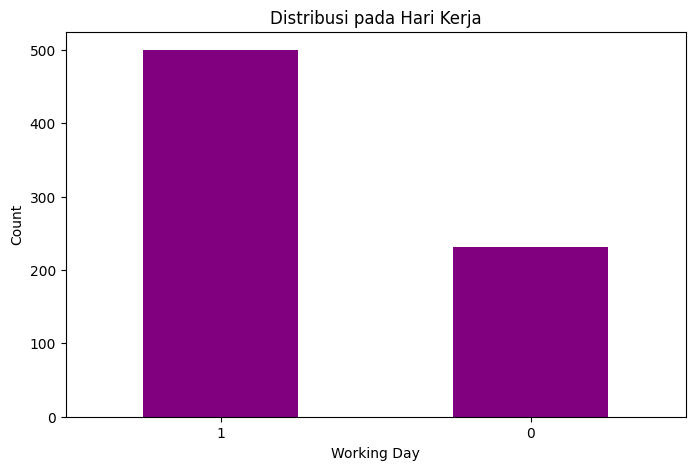

In [55]:
plt.figure(figsize=(8, 5))
day_df['workingday'].value_counts().plot(kind='bar', color='purple')
plt.title('Distribusi pada Hari Kerja')
plt.xlabel('Working Day')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Distribusi dan statistik Weekday dari day_df

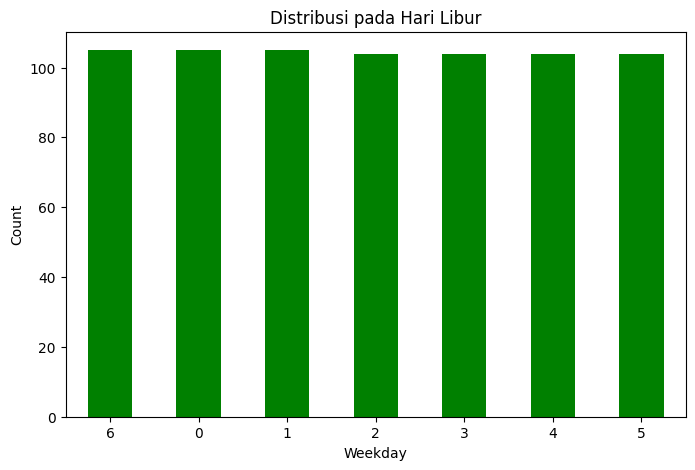

In [56]:
plt.figure(figsize=(8, 5))
day_df['weekday'].value_counts().plot(kind='bar', color='green')
plt.title('Distribusi pada Hari Libur')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Distribusi dan statistik Weathersit dari day_df

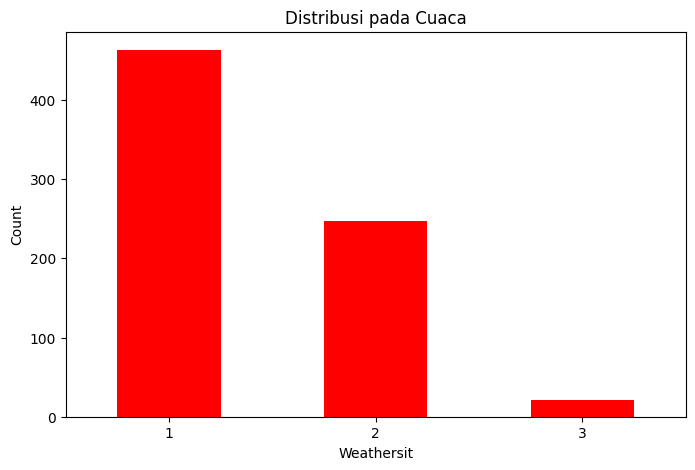

In [57]:
plt.figure(figsize=(8, 5))
day_df['weathersit'].value_counts().plot(kind='bar', color='red')
plt.title('Distribusi pada Cuaca')
plt.xlabel('Weathersit')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Distribusi dan statistik Weathersit dari hour_df

### Explore....

Menampilkan seluruh data

In [ ]:
day_df.describe(include="all")

Menggabungkan frame dari day_df berdasarkan workingday, weekend, dan weathersit lalu menghitung jumlah dari casual, registered, dan count.

In [ ]:
day_df.groupby(by=["workingday", "weekday", "weathersit"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

Menggabungkan frame dari day_df berdasarkan season dan data dan menghitung jumlah dari casual, registered, dan count.

In [ ]:
day_df.groupby(by=["season", "dteday"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})


## Visualization & Explanatory Analysis

### Pertanyaan 1: Scatter Plot Suhu & dan jumlah perjalanan.
Membuat scatter plot untuk membandingkan suhu dengan jumlah perjalanan pada hari kerja. Saya menambahkan beberapa function agar scatter plot bisa tampil di notebook dan streamlit.

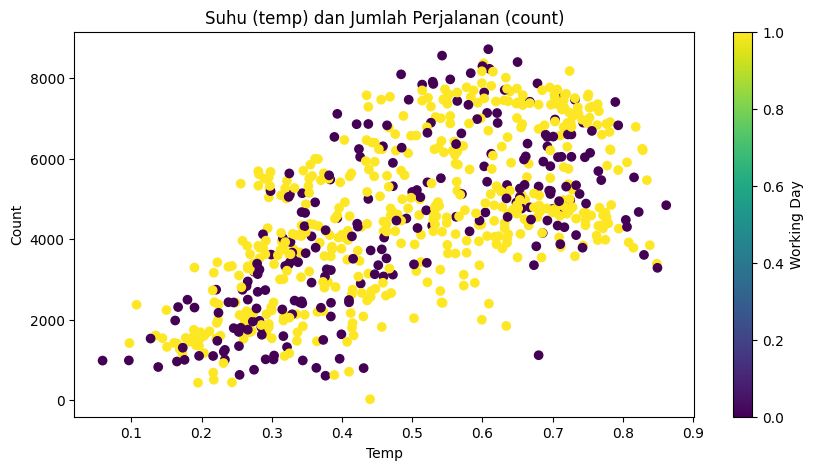

In [64]:
def scatter_plot(data):
    fig, ax = plt.subplots(figsize=(10, 5))
    scatter = ax.scatter(x=data['temp'], y=data['cnt'], c=data['workingday'], cmap='viridis')
    ax.set_title('Suhu (temp) dan Jumlah Perjalanan (count)')
    ax.set_xlabel('Temp')
    ax.set_ylabel('Count')
    plt.colorbar(scatter, ax=ax, label='Working Day')
    st.pyplot(fig)
scatter_plot(day_df)
plt.show()

### Pertanyaan 2: Grafik garis pola pengguna harian.
Membuat grafik garis dari pola pengguna harian pada bike-sharing-datasheet di hari kerja dan di hari luar kerja.  Saya menambahkan beberapa function agar grafik bisa tampil di notebook dan streamlit.

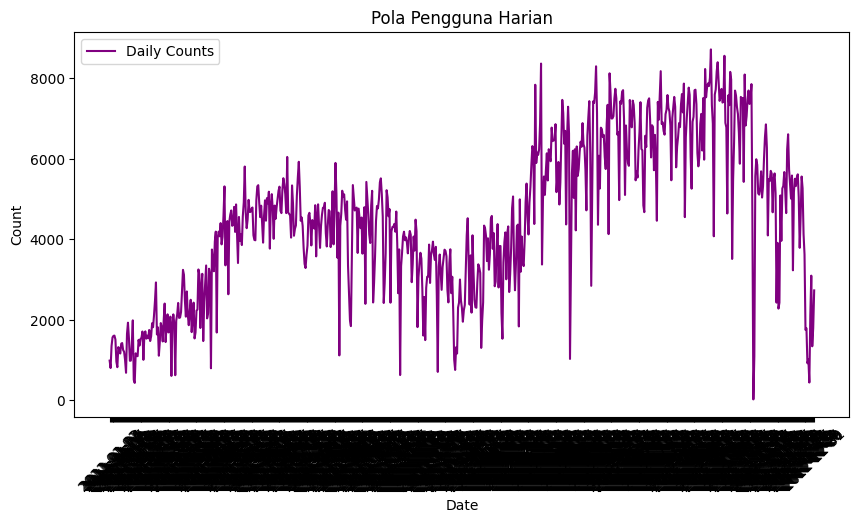

In [65]:
def line_plot(data):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(data['dteday'], data['cnt'], linestyle='-', color='purple', label='Daily Counts')
    ax.set_title('Pola Pengguna Harian')
    ax.set_xlabel('Date')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    ax.legend()
    st.pyplot(fig)
line_plot(day_df)
plt.show()

## Conclusion

- Pertanyaan 1 : Menunjukkan bahwa pada hari kerja pengguna terdaftar cenderung menyewa sepeda lebih banyak utama saat suhu tinggi. Di hari libur, pola ini bisa saja berbeda dan terlihat adanya perbedaan secara signifikan diantara pengguna terdaftar dan tidak terdaftar.
- Pertanyaan 2 : Menunnjukkan bahwa pada hari kerja, terdapat korelasi positif antara suhu dan jumlah perjalanan, terutama untuk pengguna terdaftar saja. Namun, pada hari libur mungkin saja pola ini bisa berbeda dan memerlukan lebih banyak lagi eksplorasi untuk kedepannya.

Untuk menampilkan dashboard sederhana pada streamlit

In [66]:
# Sidebar for date and time selection
st.sidebar.header('Pilih Hari dan Jam')
selected_day = st.sidebar.selectbox('Pilih Hari', day_df['dteday'].unique())
selected_hour = st.sidebar.selectbox('Pilih Jam', hour_df['hr'].unique())
# Filter data based on selected day and hour
day_filtered_data = day_df[day_df['dteday'] == selected_day]
hour_filtered_data = hour_df[(hour_df['dteday'] == selected_day) & (hour_df['hr'] == selected_hour)]
